In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [32]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Figures\evaluation_loss'
df_dtime = pd.read_csv(load_dir + r'/eval_loss_dtimeTrue_order4-15_shots1E+06.csv')
df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_order4-15_shots1E+06.csv')
OD = df_dtime['OD'][:-1]
eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
eval_loss_pois = df_pois['Evaluation Loss'].dropna()
percent_active = df_dtime['Average Percentage where Detector was Active'].dropna()
optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]

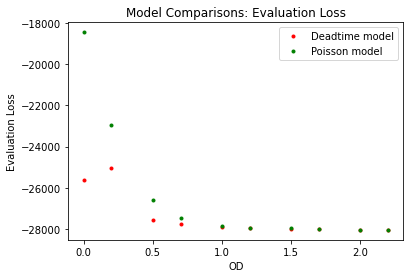

In [46]:
# Plot Eval Loss vs OD

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(OD, eval_loss_dtime, 'r.', label='Deadtime model')
ax.plot(OD, eval_loss_pois, 'g.', label='Poisson model')
ax.set_xlabel('OD')
ax.set_ylabel('Evaluation Loss')
ax.set_title('Model Comparisons: Evaluation Loss')
# ax.set_xlim([0.4, 2.3])
# ax.set_ylim([-28250, -26500])
plt.legend()
plt.show()

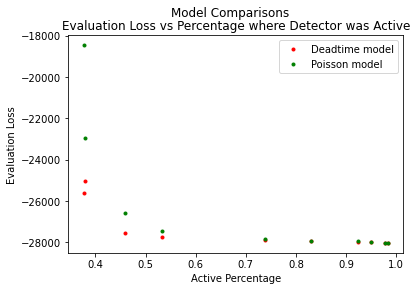

In [34]:
# Plot Eval Loss vs Average Active-Detector Percentage

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(percent_active, eval_loss_dtime, 'r.', label='Deadtime model')
ax.plot(percent_active, eval_loss_pois, 'g.', label='Poisson model')
ax.set_xlabel('Active Percentage')
ax.set_ylabel('Evaluation Loss')
plt.suptitle('Model Comparisons')
plt.title('Evaluation Loss vs Percentage where Detector was Active')
plt.legend()
plt.show()

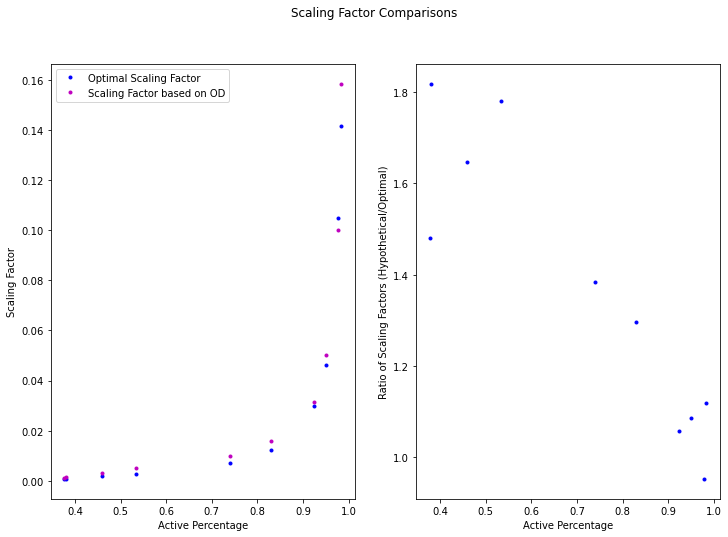

In [67]:
# Plot scaling factors vs Average Active-Detector Percentage

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax1.plot(percent_active, optimal_C, 'b.', label='Optimal Scaling Factor')
ax1.plot(percent_active, OD_C, 'm.', label='Scaling Factor based on OD')
ax1.set_xlabel('Active Percentage')
ax1.set_ylabel('Scaling Factor')
ax2 = fig.add_subplot(122)
ax2.plot(percent_active, OD_C/optimal_C, 'b.', label='Optimal Scaling Factor')
ax2.set_xlabel('Active Percentage')
ax2.set_ylabel('Ratio of Scaling Factors (Hypothetical/Optimal)')
plt.suptitle('Scaling Factor Comparisons')
ax1.legend()
plt.show()

C:\Users\Grant\AppData\Local\Temp\ipykernel_5264\2317091879.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax.pcolormesh(OD, num_shot_full, eval_loss_dtime_full)


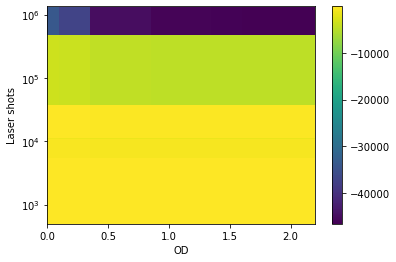

In [119]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\Deadtime_Experiments\Figures\evaluation_loss\iter_num_shots_test'
files = []
eval_loss_dtime_full = []
num_shot_full = []
for file in os.listdir(load_dir):
    if file.endswith('.csv'):
        files.append(r'/'+file)
        df_dtime = pd.read_csv(load_dir + r'/'+file)
        num_shot = float(file[-9:-4])
        OD = df_dtime['OD'][:-1]
        eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
        percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
        optimal_C = df_dtime['Optimal Scaling Factor'].dropna()
        OD_C = df_dtime['Hypothetical Scaling Factor'][:-1]
        
        num_shot_full.append(num_shot)
        eval_loss_dtime_full.append(eval_loss_dtime)
        
# print(np.array(eval_loss_dtime_full))

max_lsr_num_lst = np.floor(np.logspace(3, 7, 16)).astype(int)[:-4]

fig = plt.figure()
ax = fig.add_subplot(111)
c = ax.pcolormesh(OD, num_shot_full, eval_loss_dtime_full)
ax.axis([OD.min(), OD.max(), 0.5*min(num_shot_full), 1.5*max(num_shot_full)])
ax.set_ylabel('Laser shots')
ax.set_xlabel('OD')
ax.set_yscale('symlog')
fig.colorbar(c, ax=ax)
plt.show()
